<h1><center>
    ECE 438 - Laboratory 6b<br/>
    Discrete Fourier Transform and Fast Fourier Transform Algorithms (Week 2)<br/>
    <small>Last updated on February 27, 2022</small><br/>
    <br/>
    Date: 9/22<br/> 
    Section:Thursday 2:30 Lab<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]|Davis Ashbrook| 1 hour|
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding of the frequency range of DFT and effects of zero-padding (50 pts)**: *DFT and DTFT plots, Python code (DTFTsamples), questions*||||
|**Implementation of Divide-and-Conquer DFT and FFT (50 pts)**: *Python codes (dcDFT, fft2, fft4, fft8, fft_stages), questions*||||

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from helper import DTFT, DFTsum, hamming

In [88]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2.1: Shifting the Frequency Range</left></h3>

**1. Create a Hamming window ```x``` of length ```N = 20```, using the provided function `hamming()`, then compute the 20 point DFT of `x` using the provided function `DFTsum()`, and finally, plot the magnitude of the DFT, $|X_{20}(k)|$, versus the index $k$.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

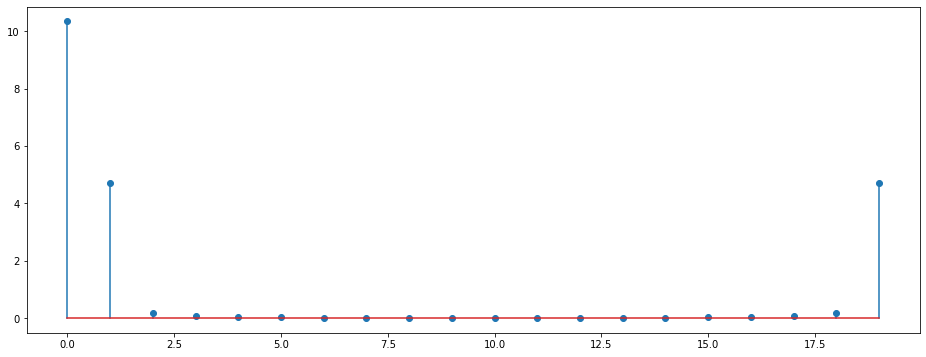

In [89]:
# insert your code here
x = hamming(20)
k = range(20)
xdft = DFTsum(x)
plt.stem(k, np.abs(xdft))

**2. Complete the function `DTFTsamples` below to compute the samples of the DTFT and their corresponding frequencies.**

**Note:** Your function ```DTFTsamples(x)``` should call your function `DFTsum()` and use the function ```np.fft.fftshift()```.

In [90]:
def DTFTsamples(x):
    """
    Compute samples of the DTFT and their corresponding frequencies in the range -np.pi to np.pi
    
    Parameters:
    ---
    x: an N-point vector
    
    Returns:
    ---
    X: the length N vector of DTFT samples
    w: he length N vector of corresponding radial frequencies
    """
    X = DFTsum(x)
    N = len(x)
    k = np.arange(0, N, 1)
    w = 2 * np.pi * k / N
    w[w >= np.pi] = w[w >= np.pi] - 2 * np.pi
    X = np.fft.fftshift(X)
    w = np.fft.fftshift(w)
    
    return X, w

**3. Use your function ```DTFTsamples``` to compute DTFT samples of the Hamming window of length $N = 20$. Plot the magnitude of these DTFT samples versus frequency in rad/sample.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

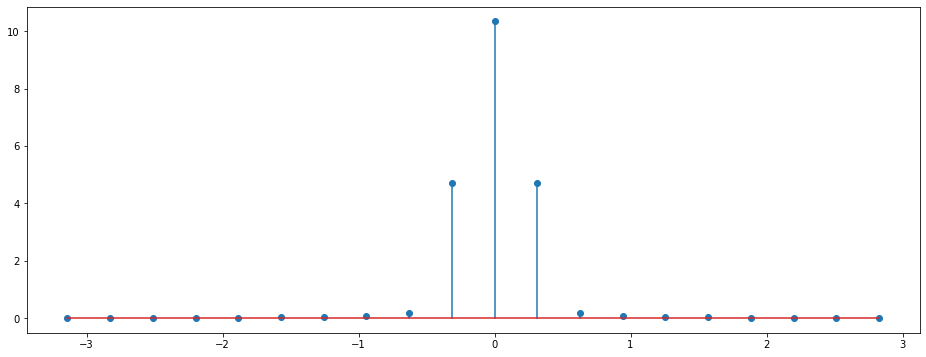

In [91]:
# insert your code here
X, w = DTFTsamples(x)
plt.stem(w, np.abs(X))


<h3 style="color:red;"><left>Exercise 2.2: Zero Padding</left></h3>

**1. For $N=50$, compute the vector $x$ containing the values $x[0],\dots, x[N − 1]$, then compute the samples of $X[k]$ using your function ```DTFTsamples()```, and finally plot the magnitude of the DTFT samples versus frequency in rad/sample.**

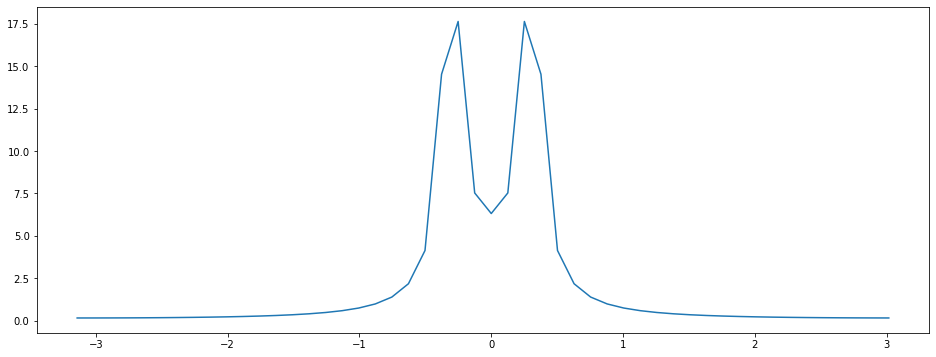

In [92]:
# insert your code here
N = 50
k = np.arange(0, N, 1)
x = np.sin(0.1 * np.pi * k)
X, w = DTFTsamples(x)

plt.plot(w, np.abs(X))



**2. For $N=100$, compute the vector $x$ containing the values $x[0],\dots, x[N − 1]$, then compute the samples of $X[k]$ using your function ```DTFTsamples()```, and finally plot the magnitude of the DTFT samples versus frequency in rad/sample.**

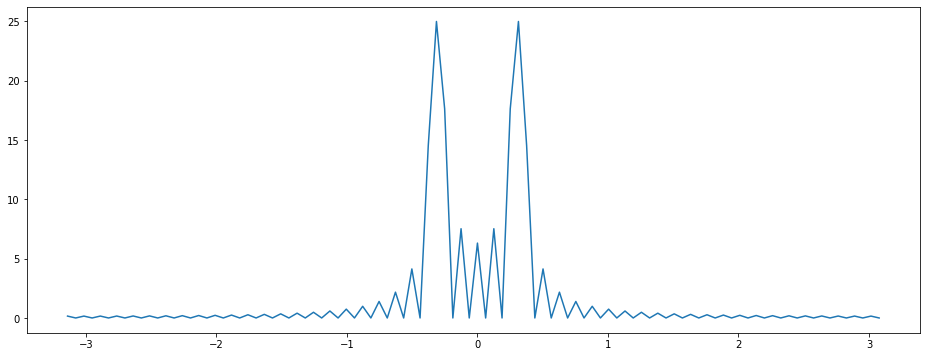

In [93]:
# insert your code here
N = 100
k = np.arange(0, N, 1)
x = np.sin(0.1 * np.pi * k[0:50])
x = np.append(x, np.zeros(int(N/2)))
X, w = DTFTsamples(x)

plt.plot(w, np.abs(X))


**3. Which plot looks more like the true DTFT?**

plot 2 using N = 100 looks more like the true DTFT

**3. Explain why the plots look so different.**

The second plot has more data points crammed into the -pi to pi space allowing us to see more of the values of the DTFT on our DFT plot, and plot 2 approximates the height of peaks better because it is able to use more data points in calculating its sums.

<h3 style="color:red;"><left>Exercise 3.1: Implementation of Divide-and-Conquer DFT</left></h3>

**1. Complete the function `dcDFT` below.**

In [94]:
def dcDFT(x):
    """
    Parameters:
    ---
    x: a vector of even length N
    
    Returns: the DFT of x
    """
    
    # Step 1
    # Separate the samples of x into even and odd points.
    # Hint: The Python function x0 = x[0:N:2] can be used to obtain the “even” points.
    N = len(x)
    k = np.arange(0, int(N/2), 1)

    x0 = x[0:N:2]
    x1 = x[1:N:2]
    
    # Step 2
    # Use your function DFTsum to compute the two N/2 point DFT’s.
    X0 = DFTsum(x0)
    X1 = DFTsum(x1)

    # Step 3
    # Multiply by the twiddle factors$
    
    W = np.exp(-2j * np.pi * k / N)
    WX1 = W * X1

    # Step 4
    # Combine the two DFT’s to form X
    X = np.zeros(N)
    X[0: int(N/2)] = X0 + WX1
    X[int(N/2): N] = X0 - WX1

    
    return X

**2. Test your function ```dcDFT``` by using it to compute and plot the DFT’s of the following signals:**

* $x[n]=\delta[n]$ for $N=10$
* $x[n]=1$ for $N=10$
* $x[n]=e^{j2\pi n/10}$ for $N=10$

**Make sure you plot the results in separate cells.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

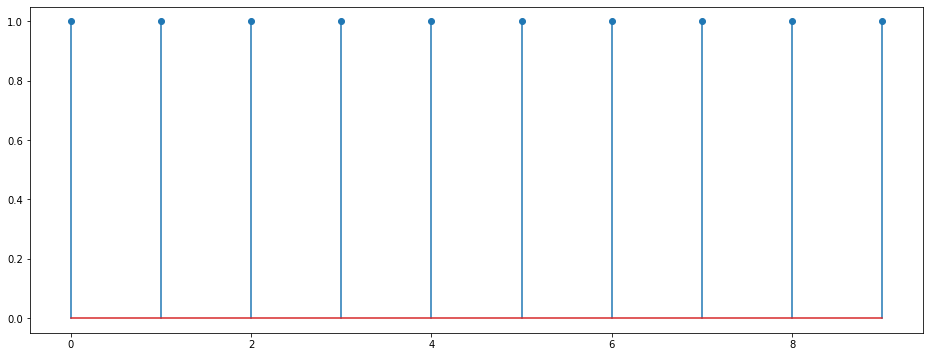

In [95]:
# first signal
N = 10
n = np.arange(0, N, 1)

x1 = (n == 0).astype(float)
X1 = dcDFT(x1)
plt.stem(n, np.abs(X1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

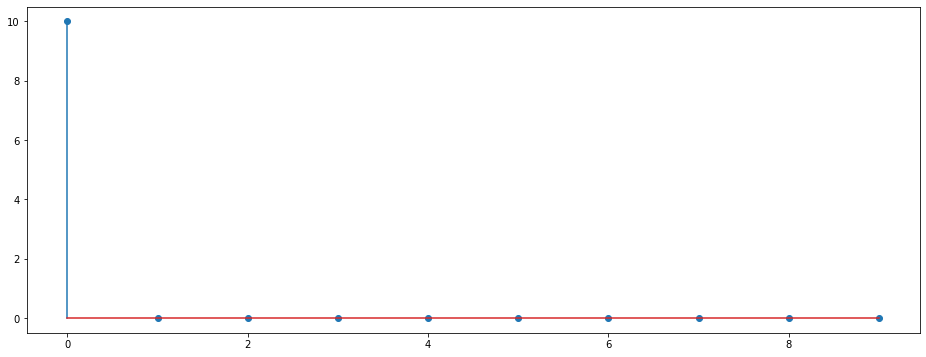

In [96]:
# second signal

x2 = np.ones(N)
X2 = dcDFT(x2)
plt.stem(n, np.abs(X2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


<StemContainer object of 3 artists>

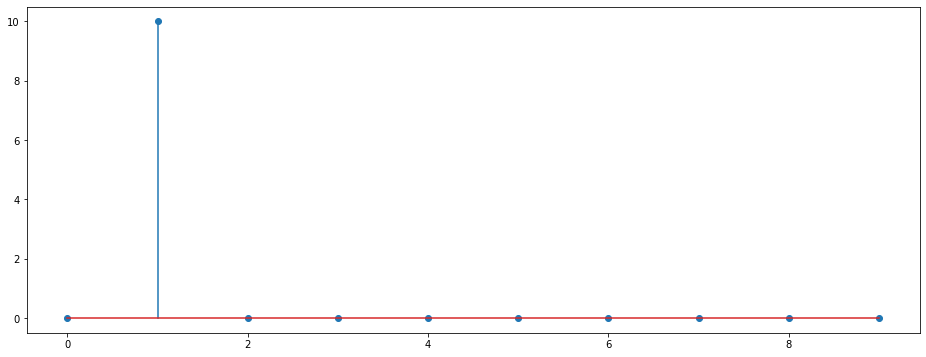

In [97]:
# third signal

x3 = np.exp(2j * np.pi * n / N)
X3 = dcDFT(x3)
plt.stem(n, np.abs(X3))


**3. Determine the number of multiplies that are required in this approach to computing an $N$ point DFT. (Consider a multiply to be one multiplication of real or complex numbers.)**

**Hint:** Refer to the diagram of Figure 1, and remember to consider the $N/2$ point DFTs.

for each N/2 point DFTs there are (N/2)^2 multiplies, then we have to do a multiplication of each twiddle factor, and there are N/2 twiddle factors. So the total amount of multiplications is (N/2)^2 + (N/2)^2 + N/2 = (N^2 + N) / 2

<h3 style="color:red;"><left>Exercise 3.2: Recursive Divide and Conquer (Part 1)</left></h3>

**1. Complete the Python functions below to compute the $2$, $4$, and $8$-point FFT’s.**

**Note:** The function ```FFT2``` should directly compute the $2$-point DFT using (13), but the functions ```FFT4``` and ```FFT8``` should compute their respective FFT’s using the divide and conquer strategy. This means that ```FFT8``` should call ```FFT4```, and ```FFT4``` should call ```FFT2```.

In [98]:
def FFT2(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 2-point DFT of x
    """
    x = x.astype(complex)
    X = np.zeros(2)
    X = X.astype(complex)
    X[0] = x[0] + x[1]
    X[1] = x[0] - x[1]
    
    return X

In [99]:
def FFT4(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 4-point DFT of x
    """
    x = x.astype(complex)
    x0 = np.array([x[0], x[2]])
    x0 = x0.astype(complex)
    x1 = np.array([x[1], x[3]])
    x1 = x1.astype(complex)

    X0 = FFT2(x0)
    X1 = FFT2(x1)

    k = np.arange(0, 2, 1)
    W = np.exp(-2j * np.pi * k / 4)

    X = np.zeros(4)
    X = X.astype(complex)
    X[0:2] = X0 + W * X1
    X[2:4] = X0 - W * X1
    
    return X

In [100]:
def FFT8(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 8-point DFT of x
    """
    x = x.astype(complex)
    x0 = np.array([x[0], x[2], x[4], x[6]])
    x0 = x0.astype(complex)
    x1 = np.array([x[1], x[3], x[5], x[7]])
    x1 = x1.astype(complex)

    X0 = FFT4(x0)
    X1 = FFT4(x1)

    k = np.arange(0, 4, 1)
    W = np.exp(-2j * np.pi * k / 8)

    X = np.zeros(8)
    X = X.astype(complex)
    X[0:4] = X0 + W * X1
    X[4:8] = X0 - W * X1
    
    return X

**2. Test your function ```FFT8``` by using it to compute the DFT’s of the following signals. Compare these results to the previous ones.**

* $x[n]=\delta[n]$ for $N=8$
* $x[n]=1$ for $N=8$
* $x[n]=e^{j2\pi n/8}$ for $N=8$

**Make sure you plot the results in separate cells.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

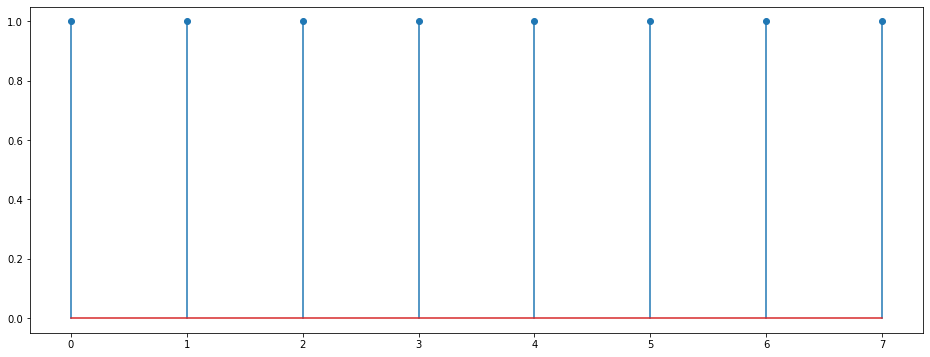

In [101]:
# first signal
N = 8
n = np.arange(0, N, 1)

x1 = (n == 0).astype(float)
X1 = FFT8(x1)
plt.stem(n, np.abs(X1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

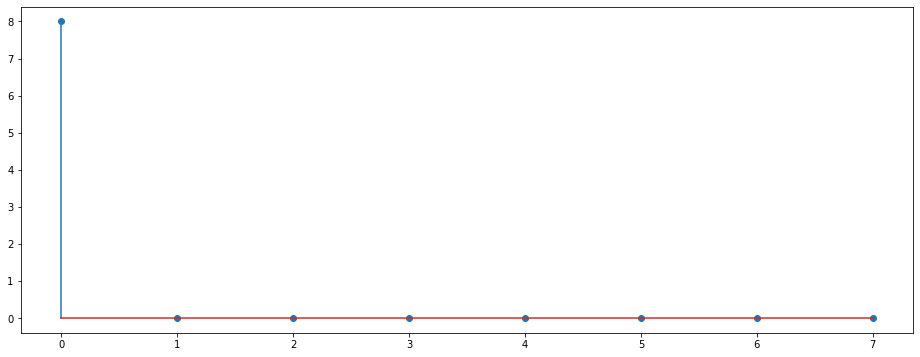

In [102]:
# second signal
x2 = np.ones(N)
X2 = FFT8(x2)
plt.stem(n, np.abs(X2))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

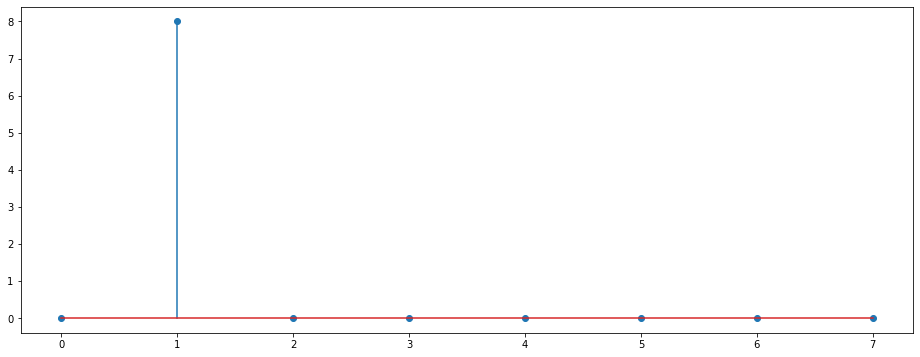

In [103]:
# third signal
x3 = np.exp(2j * np.pi * n / N)
X3 = FFT8(x3)
plt.stem(n, np.abs(X3))


**3. List the output (not plot) of ```FFT8``` for the case $x[n] = 1$ for $N = 8$.**

In [111]:
# insert your code here
X2 = X2.astype(int)
print(X2)


[8 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


**4. Calculate the total number of multiplies by twiddle factors required for your 8-point FFT. (A multiply is a multiplication by a real or complex number.)**

There are 8 multiplies by twiddle factors

**5. Determine a formula for the number of multiplies required for an $N = 2^p$ point FFT. Leave the expression in terms of $N$ and $p$. How does this compare to the number of multiplies required for direct implementation when $p = 10$?**

There would be N multiplies for an N point FFT whereas direct implementation requires N^2 multiplies. If p = 10, that means N multiplies is 2^10 = 1,024 and N^2 multiplies is (1024)^2 = 1,048,576. Way bigger!

<h3 style="color:red;"><left>Exercise 3.3: Recursive Divide and Conquer (Part 2)</left></h3>

**1. Complete the recursive function `fft_stage` below to perform one stage of the FFT algorithm for a power-of-2 length signal.**

**Note:** the body of this function should look very similar to previous functions written in this lab.

In [112]:
def fft_stage(x):
    """
    Performs one stage of the FFT algorithm for a power-of-2 length signal
    
    Parameters:
    ---
    x: a power-of-2 length signal
    
    Returns:
    ---
    X: the DFT of the input signal
    """
    
    # Step 1
    # Determine the length of the input signal.

    N = len(x)
    x = x.astype(complex)
    # Step 2
    # If N == 2, then the function should just compute the 2-pt DFT as in equation (13), and then return.
    
    if (N == 2):
      
      X = np.zeros(2)
      X = X.astype(complex)
      X[0] = x[0] + x[1]
      X[1] = x[0] - x[1]
      return (X)

    # Step 3
    # If N > 2, then the function should perform the FFT steps described previously 
    # (i.e. decimate, compute (N/2)-pt DFTs, re-combine), 
    # calling fft_stage(x) to compute the (N/2)-pt DFTs.
    else:

      x0 = x[0:N:2]
      x0 = x0.astype(complex)
      x1 = x[1:N:2]
      x1 = x1.astype(complex)

      X0 = fft_stage(x0)
      X1 = fft_stage(x1)

      k = np.arange(0, int(N / 2), 1)
      W = np.exp(-2j * np.pi * k / N)

      X = np.zeros(N)
      X = X.astype(complex)
      X[0 : int(N/2)] = X0 + W * X1
      X[int(N/2) : N] = X0 - W * X1
    
      return X

**2. Test ```fft_stage(x)``` on the three 8-point signals given above, and verify that it returns the same results as ```FFT8(x)```.**

**Make sure you plot the results in separate cells.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

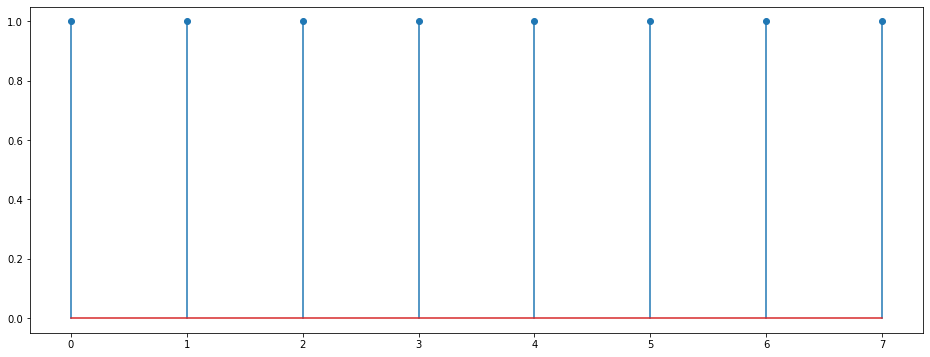

In [113]:
# first signal
N = 8
n = np.arange(0, N, 1)

x1 = (n == 0).astype(float)
X1 = fft_stage(x1)
plt.stem(n, np.abs(X1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

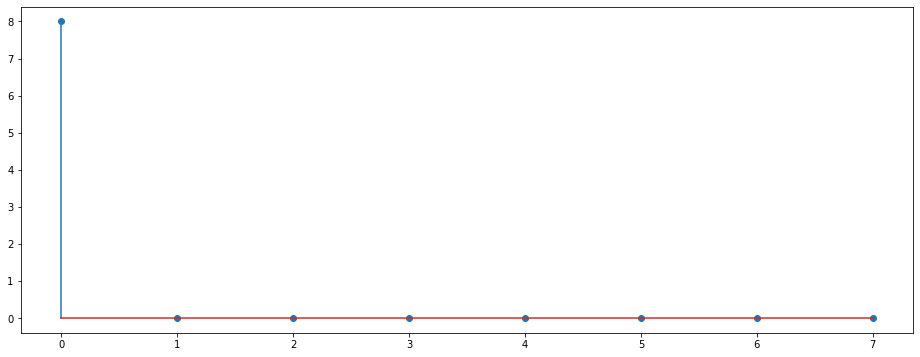

In [114]:
# second signal
x2 = np.ones(N)
X2 = fft_stage(x2)
plt.stem(n, np.abs(X2))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

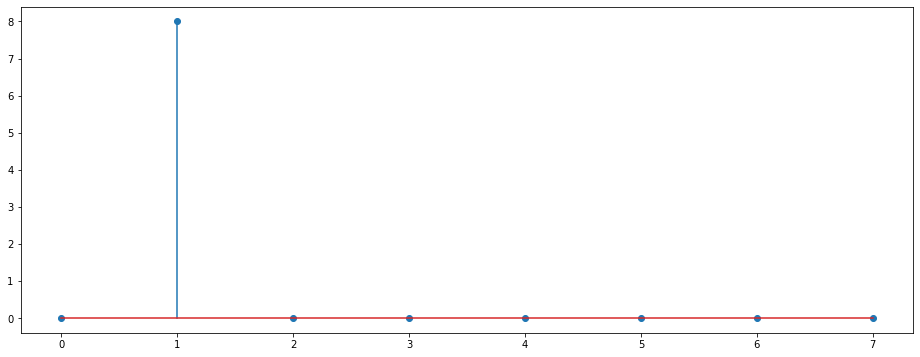

In [115]:
# third signal
x3 = np.exp(2j * np.pi * n / N)
X3 = FFT8(x3)
plt.stem(n, np.abs(X3))

<h2 style="color:salmon;"><left>4. References</left></h2>

[1] J. W. Cooley and J. W. Tukey, “An algorithm for the machine calculation of complex
Fourier series,” Mathematics of Computation, vol. 19, no. 90, p. 297-301, April 1965.